# <center>Cross Validation</center>

---
# **Table of Contents**
---

**1.** [**Introduction**](#Section1)<br>
  - **1.1** [**Understanding Cross Validation**](#Section11)
  - **1.2** [**Importance of Cross Validation**](#Section12)
  - **1.3** [**Techniques of Cross Validation**](#Section13)

**2.** [**Problem Statement**](#Section2)<br>
**3.** [**Installing & Importing Libraries**](#Section3)<br>
  - **3.1** [**Installing Libraries**](#Section31)
  - **3.2** [**Importing Libraries**](#Section32)

**4.** [**Data Acquisition & Description**](#Section4)<br>
  - **4.1** [**Data Description**](#Section41)
  - **4.2** [**Data Information**](#Section42)
  - **4.3** [**Data Pre Profiling**](#Section43)

**5.** [**Data Processing & Model Evaluation**](#Section5)<br>
  - **5.1** [**Hold Out Cross Validation**](#Section51)<br>
    - **5.1.1** [**Model Evaluation**](#Section511)<br>
    - **5.1.2** [**Model Performance**](#Section512)<br>
  - **5.2** [**K Fold Cross Validation**](#Section52)<br>  

**6.** [**Conclusion**](#Section6)<br>



---
<a name = Section1></a>
# **1. Introduction**
---

<br>


<center><img src ="https://miro.medium.com/v2/resize:fit:842/1*SEBYJsfhpcYC43CutV1V5g.png" height = "500" /></center>

<br>

<a name = Section11></a>
### **1.1 Understanding Cross Validation**

- Cross-validation is a technique that **addresses** the challenge of **model** **evaluation** by **simulating** how a model would **perform** on new data.
- It involves **partitioning** the dataset into **subsets** for training and testing, enabling **multiple rounds of model evaluation**.
- The **primary** **goal** is to **estimate** the **model's performance metrics**, such as accuracy or mean squared error, on a more representative sample of data.



<center><img src ="https://scikit-learn.org/stable/_images/grid_search_cross_validation.png" height = "500" /></center>

<br>

<a name = Section12></a>
### **1.2 Importance of Cross Validation**

- **Model Performance Assessment**: Cross-validation provides a **robust** and **unbiased** **estimate** of how well a model is expected to **perform** on new data. It **simulates** the **model's behavior on new data** by repeatedly training and validating it on different subsets of the dataset.

- **Overfitting Detection and Prevention**: Cross-validation helps identify whether a model is overfitting by **evaluating its performance** on **multiple data subsets.**

- **Model Selection**: Cross-validation helps in **comparing** the **performance** of **different models** on the **same dataset**. It helps in selecting the one that **performs the best on average** across different validation sets.

- **Hyperparameter Tuning**: Many machine learning algorithms have parameters (**hyperparameters**) that **need to be set before training**. Cross-validation helps in **tuning** these hyperparameters effectively. By trying out different combinations of hyperparameters and evaluating their impact on performance across folds, one can find the **optimal configuration**.

- **Bias-Variance Tradeoff**: Cross-validation **assists** in **understanding the trade-off** between bias and variance in a model. Cross-validation helps in maintaining the **right balance** between the two.

<center><img src ="https://miro.medium.com/v2/resize:fit:671/1*pIptNvUJHFiJ_lizQsxyOw.png" height = 500 /></center>

<br>

<a name = Section13></a>
### **1.3 Techniques of Cross Validation**
There are many techniques of cross validation. But, these are the most common methods:
- **Holdout Validation**: This is the **simplest form** of cross-validation. It involves **splitting the dataset** into two parts: a training set and a validation set. The model is trained on the training set and evaluated on the validation set.
  - Advantages:
     - **Easy** to implement.
     - **Quick** to **compute**.
  - Disadvantages:
     - **Variability** in performance due to small validation set.
     - **Less reliable** performance estimation.
<center><img src ="https://miro.medium.com/v2/resize:fit:1400/1*0aJyXdHtRrEejuWUWFM07g.png" /></center>

- **K-Fold Cross-Validation**: In this technique, the dataset is divided into **k equally sized folds**. The model is **trained k times**, each time using **k-1 folds for training** and the remaining fold for validation. The **final** performance metric is the **average of the metrics** obtained in all iterations.
  - Advantages:
     - **More reliable** performance estimation.
     - **Utilizes** the dataset more effectively.
     - Helps in **detecting** model overfitting.
 - Disadvantages:
     - Slightly **more computationally intensive** compared to holdout validation.
<center><img src ="https://www.konkconsulting.com/Content/images/articles/Article006/CrossValidation.gif"" /></center>     

- **Stratified K-Fold Cross-Validation**: Particularly useful for **imbalanced datasets**, stratified K-Fold Cross-Validation **maintains the class distribution in each fold**.
  - Advantages:
   - Effective for **imbalanced datasets**.
   - Provides **better representation** of class distributions.
   - Improves **generalization** to different classes.
 - Disadvantages:
    -  **Increased complexity** due to class balancing.
<center><img src ="https://d2mk45aasx86xg.cloudfront.net/image1_11zon_10bb3bd085.webp" /></center>
- **Leave-One-Out Cross-Validation (LOOCV)**: LOOCV takes **K-Fold Cross-Validation** to the **extreme**, where **each data point is used as a validation set** while the rest are used for training.
  - Advantages:
   - **Unbiased** performance estimate.
   - **Best utilization** of available data.
  - Disadvantages:
    - Very **computationally intensive**, especially for **large datasets**.
    - Prone to **high variance** due to limited training samples in each iteration.
<center><img src ="https://www.bijenpatel.com/content/images/2020/11/loocv.png" /></center>    

---
<a name = Section2></a>
# **2. Problem Statement**
---


- The data used in this case study is **Melbourne Housing Snapshot dataset**.
- The objective of this dataset is to to **predict Price** for houses based on some selected features.
- Let's dive into this dataset, and find that **how can cross validation be helpful in analyzing the price of houses**.
<center><img src ="https://cdn.dribbble.com/users/1815739/screenshots/14259029/media/a2a57276c9dbdfeef8797c8fc024d839.gif" /></center>


---
<a name = Section3></a>
# **3. Installing & Importing Libraries**
---

<a name = Section31></a>
### **3.1 Installing Libraries**

In [1]:
!pip install --upgrade fast_ml
!pip install --upgrade ydata-profiling
!pip install --upgrade yellowbrick

<a name = Section32></a>
### **3.2 Importing Libraries**

In [2]:
#-------------------------------------------------------------------------------------------------------------------------------
import pandas as pd                                                 # Importing for panel data analysis
from ydata_profiling import ProfileReport
pd.set_option('display.max_columns', None)                          # Unfolding hidden features if the cardinality is high
pd.set_option('display.max_colwidth', None)                         # Unfolding the max feature width for better clearity
pd.set_option('display.max_rows', None)                             # Unfolding hidden data points if the cardinality is high
pd.set_option('mode.chained_assignment', None)                      # Removing restriction over chained assignments operations
pd.set_option('display.float_format', lambda x: '%.5f' % x)         # To suppress scientific notation over exponential values
#-------------------------------------------------------------------------------------------------------------------------------
import numpy as np                                                  # Importing package numpys (For Numerical Python)
#-------------------------------------------------------------------------------------------------------------------------------
import matplotlib.pyplot as plt                                     # Importing pyplot interface using matplotlib
from matplotlib.pylab import rcParams                               # Backend used for rendering and GUI integration
import yellowbrick
from yellowbrick.model_selection import CVScores                    # To visualize Cross validation scores
%matplotlib inline
#-------------------------------------------------------------------------------------------------------------------------------
from sklearn.metrics import r2_score                                # To measure the coefficient of determination for checking testing accuracy
from sklearn.metrics import mean_squared_error                      # To calculate mean squared error
from sklearn.metrics import mean_absolute_error                     # To calculate mean absolute error
from sklearn.model_selection import cross_val_score                 # For cross-validation scoring
from sklearn.model_selection import KFold                           # For K-fold cross-validation
#-------------------------------------------------------------------------------------------------------------------------------
from fast_ml.model_development import train_valid_test_split        # To split the data in training, validation, and testing part
from sklearn.linear_model import LinearRegression                   # To create a linear regression model using algorithm
from sklearn.tree import DecisionTreeRegressor                      # To create a decision tree regression model using algorithm
from sklearn.ensemble import RandomForestRegressor                  # To create a random forest regression model using algorithm
from xgboost import XGBRegressor                                    # To create a xg boost regression model using algorithm
#-------------------------------------------------------------------------------------------------------------------------------
import warnings                                                     # Importing warning to disable runtime warnings
warnings.filterwarnings("ignore")                                   # Warnings will appear only once

---
<a name = Section4></a>
# **4. Data Acquisition & Description**
---
- The Melbourne Housing Snapshot dataset contains information related to **real estate properties** in Melbourne, Australia.
- This dataset is valuable for understanding various factors that **influence property prices** and is often used for **predicting property prices** or making **informed decisions in the real estate market**.


| Records | Features | Dataset Size |
| :-- | :-- | :-- |
| 13580 | 21 | 461 Kb|

<br>

| Id | Features | Description |
| :-- | :--| :--|
|01| **Suburb** |The name of the suburb where the property is located.
|02| **Address** | The address of the property.|
|03|**Rooms**|  The number of rooms in the property, such as bedrooms and living areas. |
|04|**Type**| The type of the property, which can be a house, townhouse, or apartment. |
|05|**Price**| The price of the property, which serves as the target variable for price prediction. |
|06|**Method**| The method of selling the property, including auctions and private sales.|
|07| **SellerG** | The name of the real estate agency or seller.|
|08| **Date**| The date of the property sale.|
|09| **Distance**| The distance from the property to the Melbourne Central Business District (CBD).|
|10| **Postcode** | The postal code of the property location.|
|11| **Bedroom2**| The number of bedrooms in the property, a supplementary feature.|
|12| **Bathroom**| The number of bathrooms in the property.|
|13| **Car**| The number of parking spaces or car spots.|
|14| **Landsize**| The size of the land associated with the property in square meters.|
|15| **BuildingArea**| The size of the building in square meters.|
|16| **YearBuilt**| The year the property was built.|
|17| **CouncilArea**| The local council area where the property is located.|
|18| **Lattitude**| The latitude coordinate of the property's location.|
|19| **Longtitude**| The longitude coordinate of the property's location.|
|20| **Regionname**| The region name or description of the property's location|
|21| **PropertyCount**| The number of properties in the suburb.|



In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
data = pd.read_csv("melb_data.csv")
data.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,85 Turner St,2,h,1480000.00000,S,Biggin,3/12/2016,2.50000,3067.00000,2.00000,1.00000,1.00000,202.00000,NaN,NaN,Yarra,-37.79960,144.99840,Northern Metropolitan,4019.00000
1,Abbotsford,25 Bloomburg St,2,h,1035000.00000,S,Biggin,4/02/2016,2.50000,3067.00000,2.00000,1.00000,0.00000,156.00000,79.00000,1900.00000,Yarra,-37.80790,144.99340,Northern Metropolitan,4019.00000
2,Abbotsford,5 Charles St,3,h,1465000.00000,SP,Biggin,4/03/2017,2.50000,3067.00000,3.00000,2.00000,0.00000,134.00000,150.00000,1900.00000,Yarra,-37.80930,144.99440,Northern Metropolitan,4019.00000
3,Abbotsford,40 Federation La,3,h,850000.00000,PI,Biggin,4/03/2017,2.50000,3067.00000,3.00000,2.00000,1.00000,94.00000,NaN,NaN,Yarra,-37.79690,144.99690,Northern Metropolitan,4019.00000
4,Abbotsford,55a Park St,4,h,1600000.00000,VB,Nelson,4/06/2016,2.50000,3067.00000,3.00000,1.00000,2.00000,120.00000,142.00000,2014.00000,Yarra,-37.80720,144.99410,Northern Metropolitan,4019.00000


<a name = Section41></a>
### **4.1 Data Description**

- In this section we will get **information about the data** and see some observations.


In [4]:
data.describe()

,Rooms,Price,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Propertycount
count,13580.00000,13580.00000,13580.00000,13580.00000,13580.00000,13580.00000,13518.00000,13580.00000,7130.00000,8205.00000,13580.00000,13580.00000,13580.00000
mean,2.93800,1075684.07946,10.13778,3105.30191,2.91473,1.53424,1.61008,558.41613,151.96765,1964.68422,-37.80920,144.99522,7454.41738
std,0.95575,639310.72430,5.86872,90.67696,0.96592,0.69171,0.96263,3990.66924,541.01454,37.27376,0.07926,0.10392,4378.58177
min,1.00000,85000.00000,0.00000,3000.00000,0.00000,0.00000,0.00000,0.00000,0.00000,1196.00000,-38.18255,144.43181,249.00000
25%,2.00000,650000.00000,6.10000,3044.00000,2.00000,1.00000,1.00000,177.00000,93.00000,1940.00000,-37.85682,144.92960,4380.00000
50%,3.00000,903000.00000,9.20000,3084.00000,3.00000,1.00000,2.00000,440.00000,126.00000,1970.00000,-37.80235,145.00010,6555.00000
75%,3.00000,1330000.00000,13.00000,3148.00000,3.00000,2.00000,2.00000,651.00000,174.00000,1999.00000,-37.75640,145.05831,10331.00000
max,10.00000,9000000.00000,48.10000,3977.00000,20.00000,8.00000,10.00000,433014.00000,44515.00000,2018.00000,-37.40853,145.52635,21650.00000


**Observations:**

- The **minimum** number of **rooms** in a property is 1, while the **maximum** is **10**.
- Prices range from a **minimum of 85,000** to a **maximum of 9,000,000**.
- The **average distance** from the properties to Melbourne CBD is approximately **10.14 kilometers**.
- The minimum number of **bedrooms** is 0, and the **maximum** is **20**.
- The minimum number of **bathrooms** is 0, and the **maximum** is **8**.
- The minimum number of **car spaces** is 0, and the **maximum** is **10**.

- The **average land size** associated with properties is about **558.42 square meters**.
- The **average building area** is approximately **151.97 square meters**.
- The **year** of construction spans from **1196 to 2018**.



<a name = Section42></a>
### **4.2 Data Information**

- In this section we will see the **information about the types of features**.


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13580 entries, 0 to 13579
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         13580 non-null  object 
 1   Address        13580 non-null  object 
 2   Rooms          13580 non-null  int64  
 3   Type           13580 non-null  object 
 4   Price          13580 non-null  float64
 5   Method         13580 non-null  object 
 6   SellerG        13580 non-null  object 
 7   Date           13580 non-null  object 
 8   Distance       13580 non-null  float64
 9   Postcode       13580 non-null  float64
 10  Bedroom2       13580 non-null  float64
 11  Bathroom       13580 non-null  float64
 12  Car            13518 non-null  float64
 13  Landsize       13580 non-null  float64
 14  BuildingArea   7130 non-null   float64
 15  YearBuilt      8205 non-null   float64
 16  CouncilArea    12211 non-null  object 
 17  Lattitude      13580 non-null  float64
 18  Longti

In [6]:
data.shape

(13580, 21)

In [7]:
#Checking null data
nulldata = data.isnull().sum()
nulldata[nulldata>0]

Car               62
BuildingArea    6450
YearBuilt       5375
CouncilArea     1369
dtype: int64

In [8]:
# Filing null data using forward fill and backward fill
data = data.fillna(method="ffill")
data = data.fillna(method="bfill")
nulldata = data.isnull().sum()
nulldata[nulldata>0]

Series([], dtype: int64)

In [9]:
# Checking duplicates
duplicates = data.duplicated()
duplicates[duplicates==True]

Series([], dtype: bool)

In [10]:
# Selecting columns
cols_to_use = ['Rooms', 'Distance', 'Landsize', 'BuildingArea', 'YearBuilt','Price']

In [11]:
data = data[cols_to_use]
data.head()

,Rooms,Distance,Landsize,BuildingArea,YearBuilt,Price
0,2,2.50000,202.00000,79.00000,1900.00000,1480000.00000
1,2,2.50000,156.00000,79.00000,1900.00000,1035000.00000
2,3,2.50000,134.00000,150.00000,1900.00000,1465000.00000
3,3,2.50000,94.00000,150.00000,1900.00000,850000.00000
4,4,2.50000,120.00000,142.00000,2014.00000,1600000.00000


**Observations:**

- There were some **null data** which were **forward** and **backward** filled.
- There were **no** duplicates.
- For the analysis of this dataset, some **useful columns** were selected.

<a name = Section43></a>
### **4.3 Data Pre Profiling**
- To get a quick and comprehensive **overview** of the dataset's characteristics and statistics, **```ProfileReport```** from **```ydata-profiling```** is used.
- It helps in making **informed decisions** during the **data analysis and preprocessing stages**.



In [12]:
profile = ProfileReport(df=data)
profile.to_file(output_file="Pandas_Profiling_Report.html")
print('Pre-Profiling Report Ready to Download!')

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

Pre-Profiling Report Ready to Download!


**Observations:**

- **Rooms** and **Price** are highly correlated.
- The distribution is **skewed**.
- There are **6 numeric** variables


<a name = Section7></a>

---
# **5. Data Processing and Model Evaluation**
---

<a name = Section51></a>
### **5.1 Hold out Cross Validation**



In [13]:
# Splitting the data into training, validation, and test sets using a custom function.
# The data and target variable "Price" are passed as inputs.

# x_train, y_train: Training data and corresponding target variable.
# x_valid, y_valid: Validation data and corresponding target variable.
# x_test, y_test: Test data and corresponding target variable.

x_train, y_train, x_valid, y_valid, x_test, y_test = train_valid_test_split(
    data,             # The dataset containing features.
    target="Price",   # The target variable to predict, which is "Price."
    train_size=0.8,   # The proportion of data for the training set (80% of the data).
    valid_size=0.1,   # The proportion of data for the validation set (10% of the data).
    test_size=0.1,    # The proportion of data for the test set (10% of the data).
    random_state=42   # A random seed for reproducibility (setting the random state).
)

In [14]:
# Iterate through a list of dataframes and series: x_train, y_train, x_valid, y_valid, x_test, y_test
for i in [x_train, y_train, x_valid, y_valid, x_test, y_test]:
    # Reset the index of the dataframe or series, dropping the existing index
    i.reset_index(drop=True, inplace=True)

print(f'The shape of training features is {x_train.shape}\n')
print(f'The shape of training target is {y_train.shape}\n')
print(f'The shape of validation features is {x_valid.shape}\n')
print(f'The shape of validation target is {y_valid.shape}\n')
print(f'The shape of testing features is {x_test.shape}\n')
print(f'The shape of testing target is {y_test.shape}')

The shape of training features is (10864, 5)

The shape of training target is (10864,)

The shape of validation features is (1358, 5)

The shape of validation target is (1358,)

The shape of testing features is (1358, 5)

The shape of testing target is (1358,)


In [15]:
# Creating a Linear Regression model instance
linreg = LinearRegression()

# Creating a Decision Tree Regressor model instance
dtree = DecisionTreeRegressor()

# Creating a Random Forest Regressor model instance
rforest = RandomForestRegressor()

# Creating an XGBoost Regressor model instance
xgb = XGBRegressor()

<a name = Section511></a>
### **5.1.1 Model Evaluation**



In [16]:
def model_evaluation(model):
    # Fit the model on the training data
    model.fit(x_train, y_train)

    # Predict the target variable on the validation data
    y_pred_valid = model.predict(x_valid)

    # Print the R-squared (coefficient of determination) for validation data
    print(f"Validation Score = {r2_score(y_valid, y_pred_valid)}\n")

    # Print the model's score (often the R-squared) on the training data
    print(f"Train Score = {model.score(x_train, y_train)}\n")

    # Return a dictionary with training and validation scores for further analysis
    return {
        "Training Score": model.score(x_train, y_train),
        "Validation Score": r2_score(y_valid, y_pred_valid)
    }

In [17]:
results = {}

In [18]:
results['Linear Regression'] = model_evaluation(linreg)

Validation Score = 0.4145496127337748

Train Score = 0.3706718473109215



In [19]:
results['Decision Tree'] = model_evaluation(dtree)

Validation Score = 0.2452408662933694

Train Score = 0.9988357421920117



In [20]:
results['Random Forest'] = model_evaluation(rforest)

Validation Score = 0.6159963137763782

Train Score = 0.9434842800376099



In [21]:
results['XGB'] = model_evaluation(xgb)

Validation Score = 0.6618879971774609

Train Score = 0.8675104341252062



In [22]:
resultsdf = pd.DataFrame(results)
resultsdf

,Linear Regression,Decision Tree,Random Forest,XGB
Training Score,0.37067,0.99884,0.94348,0.86751
Validation Score,0.41455,0.24524,0.61600,0.66189


**Observations:**
- Based on the difference between training and validation score of model, **XGB Regressor** should be selected for **testing the model performance**.

<a name = Section512></a>
### **5.1.2 Model Performance**



In [23]:
def model_performance(model):
    # Fit the model using the training data
    model.fit(x_train, y_train)

    # Make predictions on the test data
    y_pred_test = model.predict(x_test)

    # Print the test score (R-squared) to evaluate the model's performance on the test data
    print(f"Test Score = {r2_score(y_test, y_pred_test)}\n")

    # Print the training score to assess the model's performance on the training data
    print(f"Train Score = {model.score(x_train, y_train)}\n")

    # Calculate and print the Mean Squared Error (MSE) to quantify prediction errors
    print(f"Mean Squared Error = {mean_squared_error(y_test, y_pred_test)}\n")

    # Calculate and print the Root Mean Squared Error (RMSE), which is the square root of MSE
    print(f"Root Mean Squared Error = {np.sqrt(mean_squared_error(y_test, y_pred_test))}\n")

    # Calculate and print the Mean Absolute Error (MAE), which measures the average absolute errors
    print(f"Mean Absolute Error = {mean_absolute_error(y_test, y_pred_test)}")

    # Return a dictionary containing various performance metrics for the model
    return {
        "Training Score": model.score(x_train, y_train),
        "Test Score": r2_score(y_test, y_pred_test),
        "MSE": mean_squared_error(y_test, y_pred_test),
        "RMSE": np.sqrt(mean_squared_error(y_test, y_pred_test)),
        "MAE": mean_absolute_error(y_test, y_pred_test)
    }

In [24]:
performance = {}

In [25]:
performance['XGB'] = model_performance(xgb)

Test Score = 0.6630551991161251

Train Score = 0.8675104341252062

Mean Squared Error = 130402795724.13625

Root Mean Squared Error = 361113.2727055823

Mean Absolute Error = 230883.95477609537


**Observations**:
- The model performance is **not quite good** with the **hold out cross validation**.
- The **Test Score is low**, also the **residual error** is **high**.
- Next, trying **K Fold Cross Validation** could help.

<a name = Section52></a>
### **5.2 K Fold Cross Validation**



In [26]:
x = data.drop(columns = 'Price')
y = data[['Price']]

In [32]:
def k_fold(model):
    # Create a 10-fold cross-validation iterator with shuffling and a random seed for reproducibility.
    kf = KFold(n_splits=10, shuffle=True, random_state=1)
    mse_values = []              # Initialize a list to store mean squared error values for each fold.
    scores = []                  # Initialize a list to store R-squared scores for each fold.
    n = 0                        # Initialize a counter for the number of folds.

    # Iterate over the training and test indices for each fold.
    for train_index, test_index in kf.split(x):
        # Fit the model to the training data for the current fold.
        model_fit = model.fit(x.iloc[train_index], y.iloc[train_index])

        # Calculate and store the mean squared error for the test data of the current fold.
        mse_values.append(mean_squared_error(y.iloc[test_index], model_fit.predict(x.iloc[test_index])))

        # Calculate and store the R-squared score for the entire dataset based on the model fit.
        scores.append(model_fit.score(x, y))

        n += 1  # Increment the fold counter.

    # Perform cross-validation with the model and print the results.
    cross_score = cross_val_score(model, x, y, cv=kf)
    print("Cross Validation Scores are {}".format(cross_score))
    print("Average Cross Validation score :{}".format(cross_score.mean()))

    # Print the average mean squared error and R-squared values across all folds.
    print(f'Average MSE across {n} folds: {np.mean(mse_values)}')
    print(f'Average R2 across {n} folds: {np.mean(scores)}')

    # Create a visualizer to visualize the cross-validation R-squared scores.
    visualizer = CVScores(model, cv=kf, scoring='r2')
    visualizer.fit(x, y)
    visualizer.show()

    # Return a dictionary with the average cross-validation score and average R-squared score.
    return {"Avg Cross Validation Score" : cross_score.mean(),
          "Average R2 score" : np.mean(scores)}


In [33]:
k_fold_results = {}

Cross Validation Scores are [ 0.40290797  0.35264063 -1.36790632  0.33800364  0.37647689  0.37350909
  0.37359836  0.40223888  0.36517087  0.36293528]
Average Cross Validation score :0.19795752793716928
Average MSE across 10 folds: 327190294250.9061
Average R2 across 10 folds: 0.35702220972054877


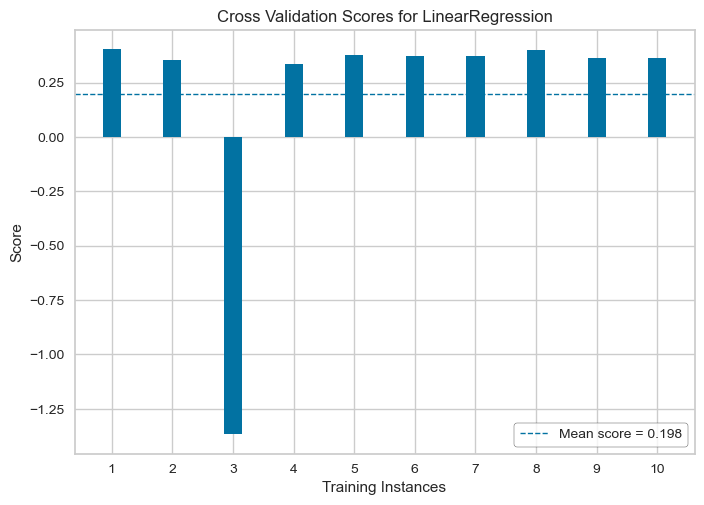

In [34]:
k_fold_results['Linear Regression'] = k_fold(linreg)

Cross Validation Scores are [0.21339438 0.12779882 0.33030057 0.20700505 0.21005281 0.37089848
 0.22840727 0.30643696 0.34648381 0.30780845]
Average Cross Validation score :0.2648586602948545
Average MSE across 10 folds: 302760583707.1451
Average R2 across 10 folds: 0.924819102283006


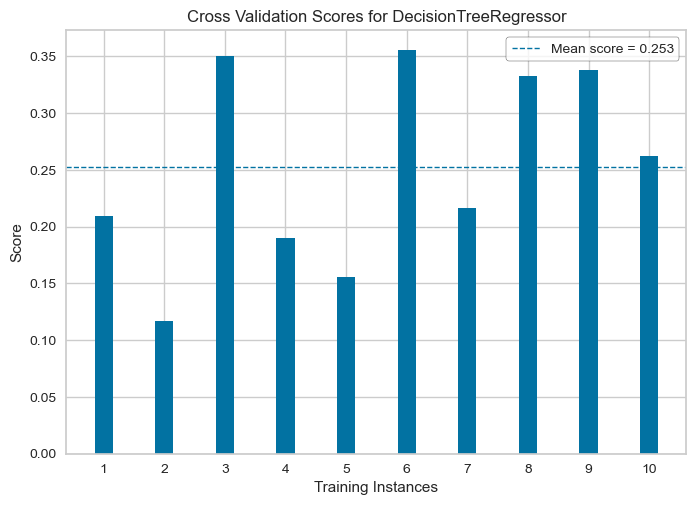

In [35]:
k_fold_results['Decision Tree'] = k_fold(dtree)

Cross Validation Scores are [0.63468566 0.6003796  0.6147803  0.55652702 0.61143351 0.62377845
 0.61965997 0.63385444 0.66750327 0.59666391]
Average Cross Validation score :0.6159266127456255
Average MSE across 10 folds: 157413430086.35538
Average R2 across 10 folds: 0.9122334587215434


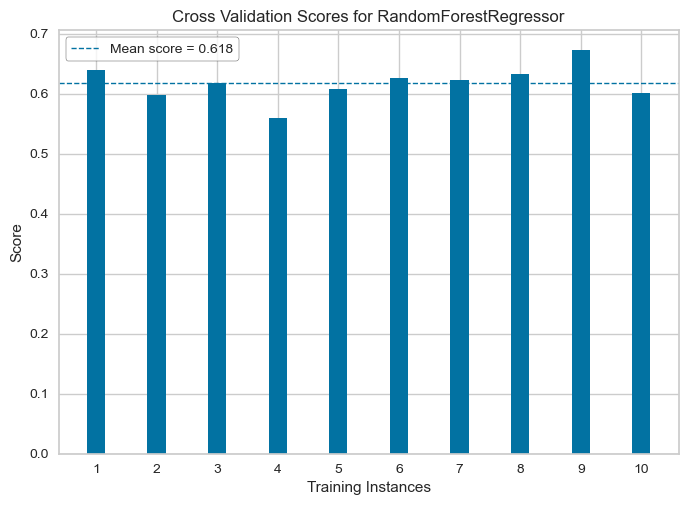

In [36]:
k_fold_results['Random Forest'] = k_fold(rforest)

Cross Validation Scores are [0.63602797 0.64730645 0.6486332  0.57936383 0.66679542 0.67321163
 0.64356654 0.66160914 0.6932972  0.6250631 ]
Average Cross Validation score :0.6474874503277627
Average MSE across 10 folds: 143823032602.0235
Average R2 across 10 folds: 0.8426117216212686


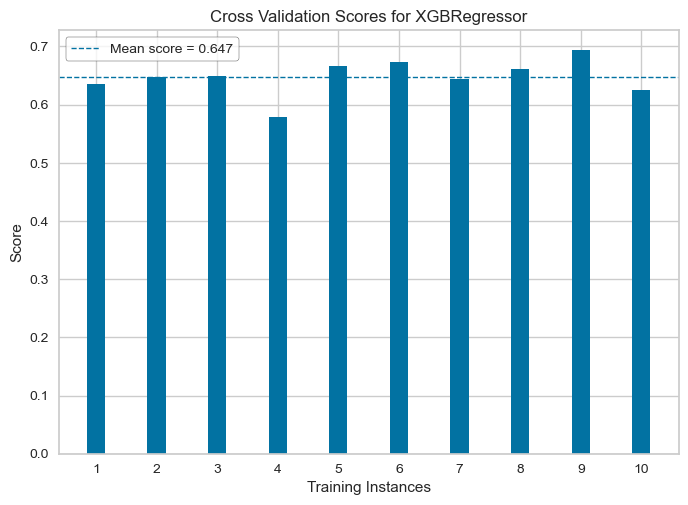

In [37]:
k_fold_results['XGB'] = k_fold(xgb)

In [38]:
kfold_df = pd.DataFrame(k_fold_results)
kfold_df

,Linear Regression,Decision Tree,Random Forest,XGB
Avg Cross Validation Score,0.19796,0.26486,0.61593,0.64749
Average R2 score,0.35702,0.92482,0.91223,0.84261


**Observations:**

- With K fold cross validation, the **best cross validation score** is good with **XGB Regressor**.
- Also, with this cross validation, there is an **increase** in **R2 score**.

<a name = Section6></a>

---
# **6. Conclusion**
---
- The cross validation tells us the **best way of splitting the data** to overthrow the **bias variance tradeoff**.
- With this dataset, we were able to saw **overfitting**, which was reduced by **K fold cross validation** to certain level.
- Now, the model has been selected, it's time to **tune** the **hyperparameters** of the regression model to **overthrow overfitting properly**.